# Revision to Tensorflow variables

In [1]:
import tensorflow as tf
import numpy as np
import helper
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Placeholder and Variable operations 


Step 1: Initialize Variables 

In [2]:
tf.reset_default_graph() 

#A = tf.Variable([[1,2,3],[4,5,6],[7,8,9]], dtype=tf.float32, name="var_A") # we can name our variables
init = tf.constant([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
A = tf.get_variable("var_A",initializer=init, dtype=tf.float32) # we can name our variables


#B = tf.Variable([[1,1,1],[1,1,1],[1,1,1]], dtype=tf.float32, name="var_B")
init = tf.constant([[1.,1.,1.],[1.,1.,1.],[1.,1.,1.]])
B = tf.get_variable("var_B",initializer=init, dtype=tf.float32)


Note: Use tf.get_variable instead of tf.variable since it will make it way easier to refactor your code if you need to share variables at any time, e.g. in a multi-gpu setting (which you will be using soon). There is no downside to it.

Pure tf.Variable is kind of lower-level; at some point tf.get_variable() did not exist so some code still uses the low-level way.

Source: Stack-overflow

Step 2: Define Operation(s)

In [3]:
summ = tf.add(A, B, name='sum') # we can name our operations such as 'sum'
mul = tf.matmul(A, B, name='mult') # matrix multiplication

See the graphs if possible

In [4]:
graph = tf.get_default_graph().as_graph_def()
helper.show_graph(graph)

Step 3: Run session after INITIALIZING the variables

In [5]:
sess = tf.InteractiveSession() # session declared
sess.run(tf.global_variables_initializer()) #variables initialized
#sess.run(A)
#sess.run(summ)
sess.run(mul)

array([[ 6.,  6.,  6.],
       [15., 15., 15.],
       [24., 24., 24.]], dtype=float32)

Similarly play around with the placeholder operations. As I said before, unlike variables you can get around Placeholders without initialising them. And proceed on with a mathematical operation.

Example 1:

In [6]:
x = tf.placeholder("float", None)
y = x * 2

with tf.Session() as session:
    #result = session.run(y, feed_dict={x: [[1, 2, 3],[3,4,5]]})
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[2. 4. 6.]


Example 2:

In [7]:

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


Carefully look at what we just did. We put in a 'None' dimension. It means we can put in any arbitrary sized value. Basically, this is how we will eventually feed in images.

# Read an Image

(300, 400, 3)


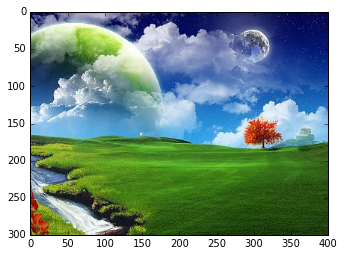

In [8]:
filename = "tensor_im.jpg"

raw_image_data = mpimg.imread(filename)

## remember to convert to a tensor ##### check devdocs for further stuff
tensor_im=tf.convert_to_tensor(raw_image_data)


image = tf.placeholder("uint8", [None, None, 3])


with tf.Session() as session:
    
    #### error #####
    #result = session.run(raw_image_data, feed_dict={image: raw_image_data})
    
    #### correct run session #####
    result = session.run(tensor_im, feed_dict={image: raw_image_data})
    
    #### wrong ### feed dict cannot be tensor, it has to be a nd-array
    #result = session.run(resized_image, feed_dict={image: resized_image})
    
    
    
    print(result.shape)

plt.imshow(result)
plt.show()

# Some basic image preprocessing with tensorflow

Apart from reading, during training you will need to preprocess your images to suit your needs, depending on what your network demands.


So let's get started with some very basic examples. This includes resizing at first.

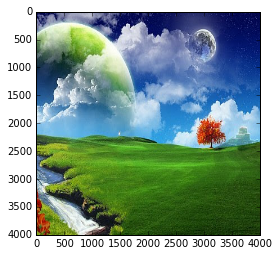

In [11]:
path = "tensor_im.jpg"
img = tf.image.decode_jpeg(tf.read_file(path), channels=3)
#img = tf.cast(tf.image.resize_images(img, [200, 200]), tf.uint8)

#play around with the size
dim1=4000
dim2=4000
img1 = tf.image.resize_images(img, [dim1,dim2]) # noisy
img2 = tf.cast(tf.image.resize_images(img, [dim1,dim2]), tf.uint8) #actual image

result_resize=sess.run(img2)
plt.imshow(result_resize)
plt.show()

You can crop your images too, and use a combined crop and resize. As it has been explained to you, you can play around with as many possibilities of image editings. The link has been given below, to explore around your options.

Cropping has a dedicated optional possibilities in tensorflow library.

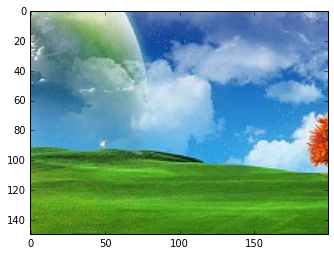

In [12]:
path = "tensor_im.jpg"
img = tf.image.decode_jpeg(tf.read_file(path), channels=3)
#img = tf.cast(tf.image.resize_images(img, [200, 200]), tf.uint8)

#play around with the size
central_fraction = 0.50
img1 = tf.image.central_crop(img,central_fraction) # noisy
#img2 = tf.cast(tf.image.resize_images(img, [dim1,dim2]), tf.uint8) #actual image

result_resize=sess.run(img1)
plt.imshow(result_resize)
plt.show()

Apart from the aforementioned tasks, you can flip, rotate, transpose, crop by bounding box, add noise and do some really useful stuff with your image in ternsorflow.

You can simply play around with all the possible preprocessing operations tensorflow has to offer. You can get started here: https://www.tensorflow.org/api_guides/python/image#Resizing